In [ ]:
import seaborn as sns
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Matplotlib

What is the distribution of passenger ages on the Titanic?

How does the fare paid by passengers vary by class?

What is the gender distribution among passengers?

Is there a relationship between age and fare paid for tickets?

What is the survival rate among passengers?

How does the survival rate differ by gender?

How does the survival rate differ by passenger class?

Are there any correlations between variables like age, fare, and class?

What is the distribution of passengers across different embarkation ports?

How does the survival rate vary based on the embarkation port?

What is the distribution of the number of siblings/spouses (SibSp) among passengers?

Is there a correlation between the number of siblings/spouses and the fare paid?

How does the distribution of passengers' titles (e.g., Mr., Mrs., Miss) look?

Does the title of a passenger relate to their class or age?

What is the distribution of passengers' cabins or cabin prefixes?

How does the fare paid by passengers with different cabin prefixes compare?

Are there any outliers in the age or fare data, and if so, what are they?

What is the distribution of the number of parents/children (Parch) aboard?

Is there a relationship between the number of parents/children and survival?

How does the survival rate vary based on the combination of passenger class and gender?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

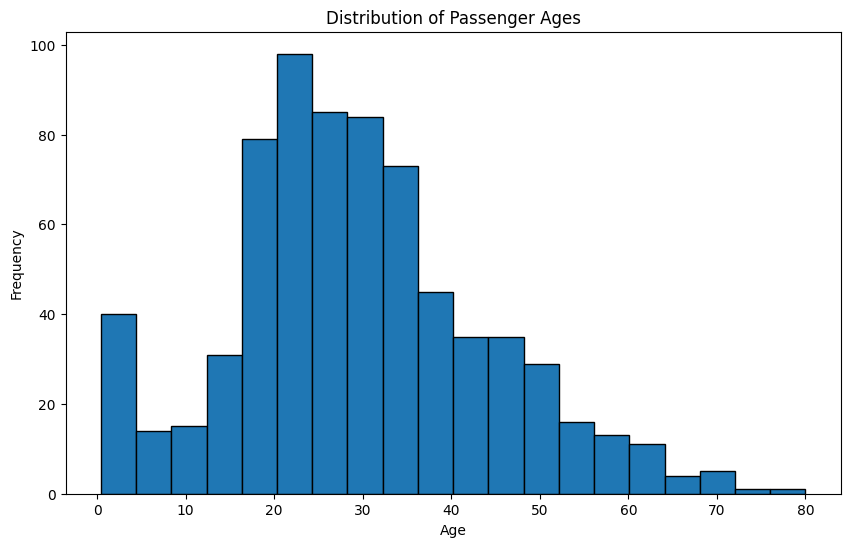

In [ ]:
# Question 1: Distribution of passenger ages
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=20, edgecolor='k')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

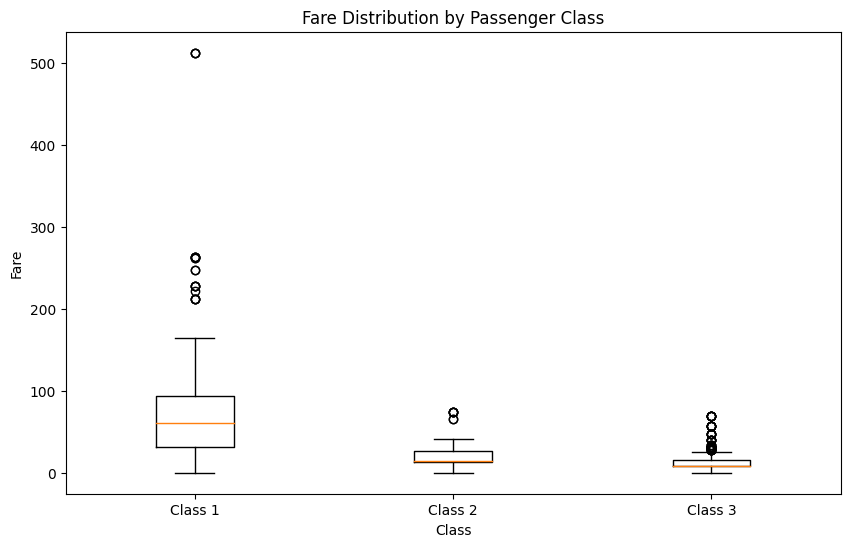

In [ ]:
# Question 2: Fare paid by passengers by class
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['pclass'] == 1]['fare'],
             df[df['pclass'] == 2]['fare'],
             df[df['pclass'] == 3]['fare']],
            labels=['Class 1', 'Class 2', 'Class 3'])
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.show()

([<matplotlib.patches.Wedge at 0x7d2dbc1a5000>,
 [Text(-0.4919454136803954, 0.9838646807152012, 'male'),
  Text(0.4919455057964525, -0.9838646346559433, 'female')],
 [Text(-0.2683338620074884, 0.5366534622082915, '64.8%'),
  Text(0.26833391225261044, -0.53665343708506, '35.2%')])

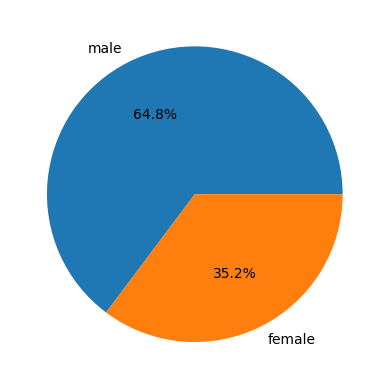

In [ ]:
# Question 3: Gender distribution among passengers
gender_counts = df['sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')


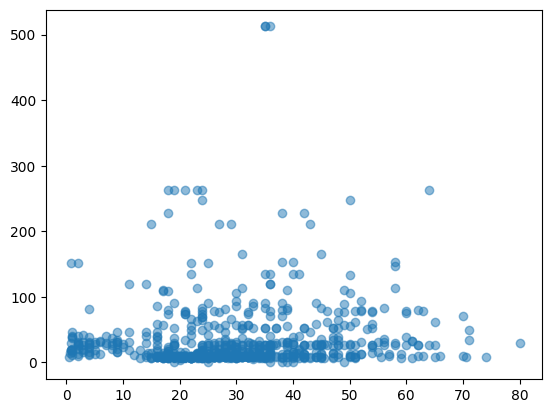

In [ ]:
# Question 4: Relationship between age and fare
plt.scatter(df['age'], df['fare'], alpha=0.5)



([<matplotlib.patches.Wedge at 0x7d2dbc0802e0>,
 [Text(-0.3925749350994583, 1.0275626113924428, '0'),
  Text(0.3925750313068116, -1.0275625746369201, '1')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.6%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.4%')])

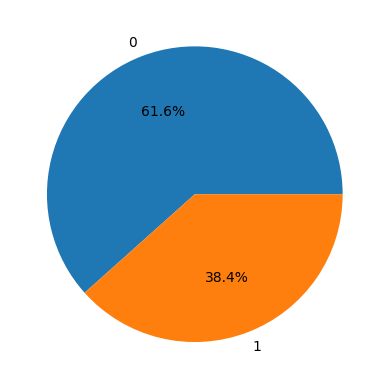

In [ ]:
# Question 5: Survival rate among passengers
survival_counts = df['survived'].value_counts()
plt.pie(survival_counts, labels=survival_counts.index, autopct='%1.1f%%')


<Axes: xlabel='survived', ylabel='count'>

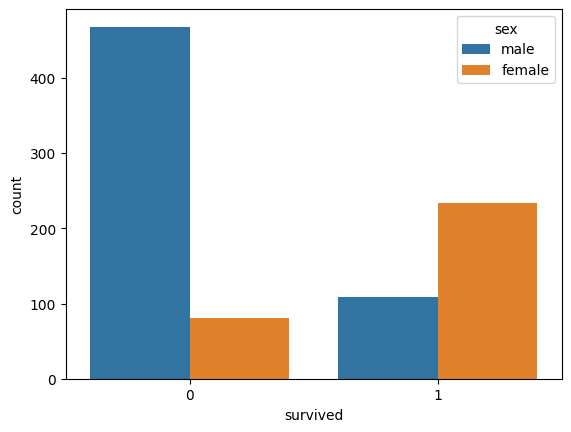

In [ ]:
# Question 6: Survival rate by gender
survival_gender = df.groupby('sex')['survived'].value_counts().unstack().fillna(0)
survival_gender.plot(kind='bar', stacked=True)



<Axes: xlabel='pclass'>

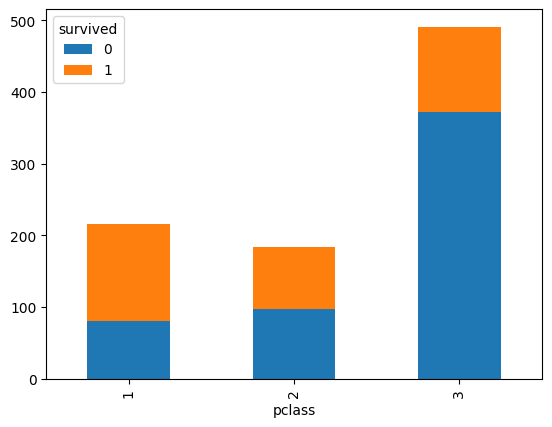

In [ ]:
# Question 7: Survival rate by passenger class
survival_class = df.groupby('pclass')['survived'].value_counts().unstack().fillna(0)
survival_class.plot(kind='bar', stacked=True)


<ipython-input-48-2f0a7495469c>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

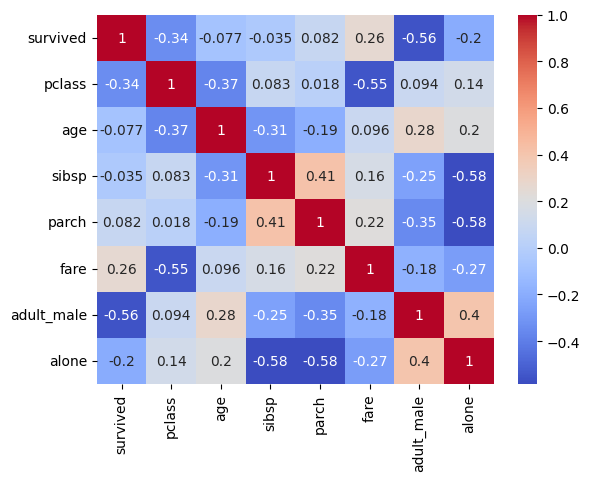

In [ ]:
# Question 8: Correlations between variables
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

<BarContainer object of 3 artists>

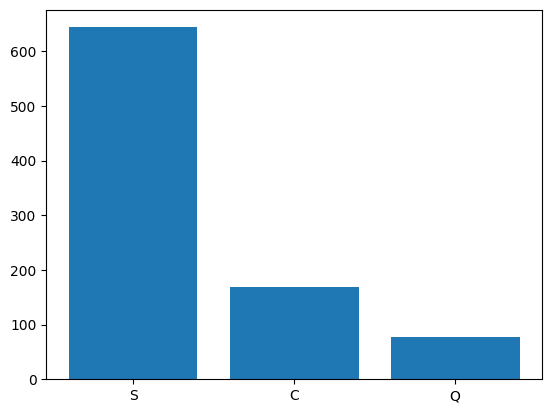

In [ ]:
# Question 9: Distribution of passengers across embarkation ports
embark_counts = df['embarked'].value_counts()
plt.bar(embark_counts.index, embark_counts.values)

<Axes: xlabel='embarked'>

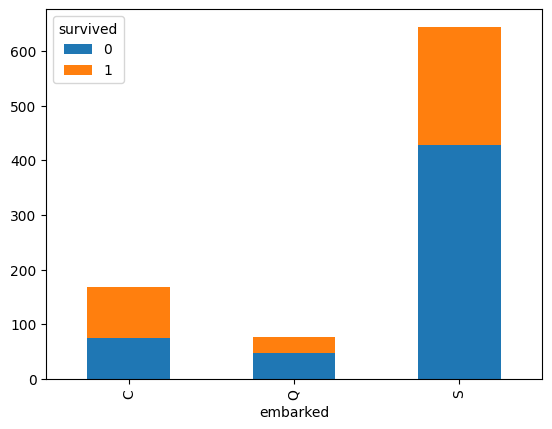

In [ ]:
# Question 10: Survival rate based on embarkation port
survival_embark = df.groupby('embarked')['survived'].value_counts().unstack().fillna(0)
survival_embark.plot(kind='bar', stacked=True)


<BarContainer object of 7 artists>

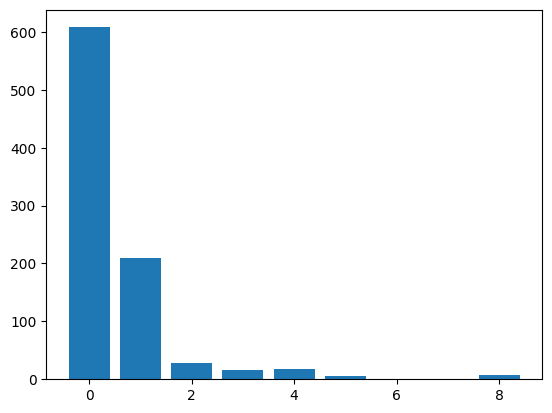

In [ ]:
# Question 11: Distribution of number of siblings/spouses (SibSp)
sibsp_counts = df['sibsp'].value_counts().sort_index()
plt.bar(sibsp_counts.index, sibsp_counts.values)


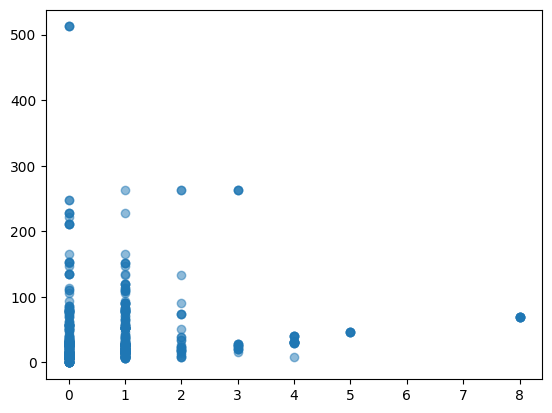

In [ ]:
# Question 12: Correlation between SibSp and fare paid
plt.scatter(df['sibsp'], df['fare'], alpha=0.5)


<BarContainer object of 3 artists>

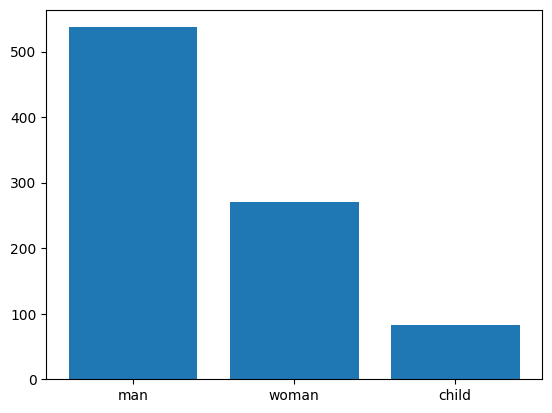

In [ ]:
# Question 13: How does the distribution of passengers' titles (e.g., Mr., Mrs., Miss) look?

title_counts = df['who'].value_counts()
plt.bar(title_counts.index, title_counts.values)


<Axes: xlabel='who', ylabel='age'>

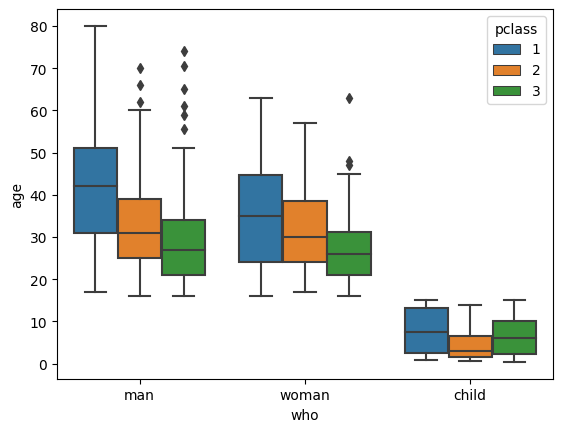

In [ ]:
## Question 14: Relationship between title, class, and age
sns.boxplot(x='who',y='age',hue='pclass',data=df)

<BarContainer object of 7 artists>

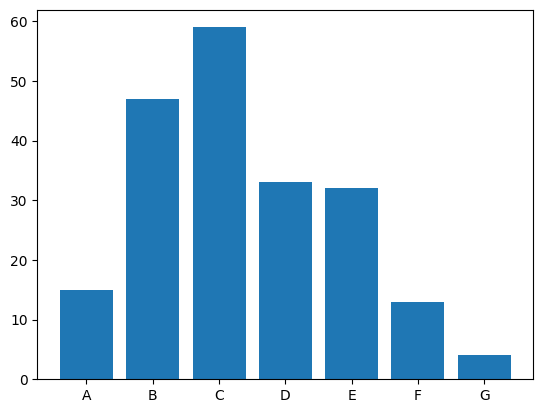

In [ ]:
# Question 15: Distribution of passengers' cabins or cabin prefixes
deck_counts = df['deck'].value_counts().sort_index()
plt.bar(deck_counts.index, deck_counts.values)

<Axes: xlabel='deck', ylabel='fare'>

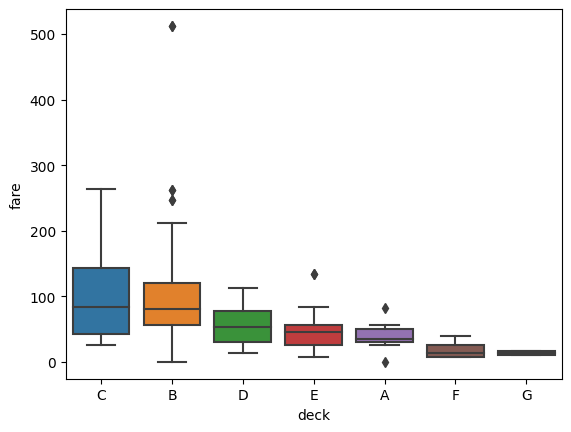

In [ ]:
# Question 16: Fare paid by passengers with different cabin prefixes
sns.boxplot(data=df, x='deck',y='fare',order=df['deck'].value_counts().index)

<Axes: xlabel='age'>

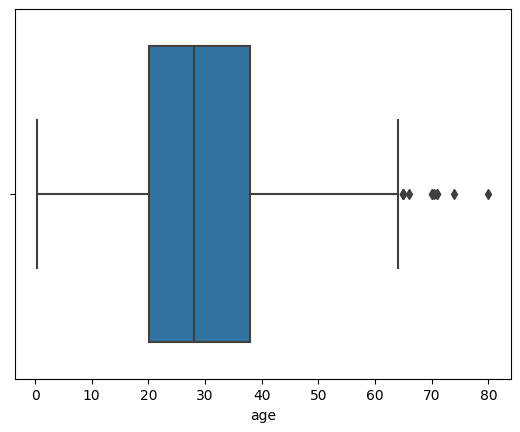

In [ ]:
# Question 17: Outliers in age or fare data
sns.boxplot(x='age', data=df)
#sns.boxplot(x='fare', data=df)

<BarContainer object of 7 artists>

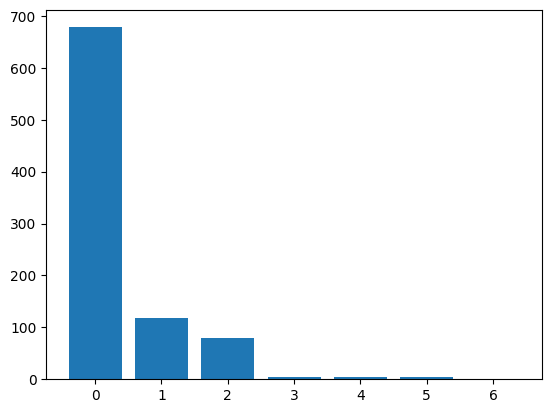

In [ ]:
# Question 18: Distribution of the number of parents/children (Parch) aboard
parch_counts = df['parch'].value_counts().sort_index()
plt.bar(parch_counts.index, parch_counts.values)


<Axes: xlabel='parch'>

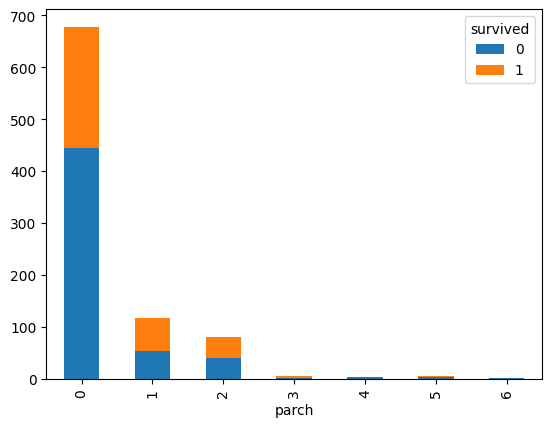

In [ ]:
# Question 19: Relationship between Parch and survival
parch_survival = df.groupby('parch')['survived'].value_counts().unstack().fillna(0)
parch_survival.plot(kind='bar', stacked=True)


<Axes: xlabel='pclass'>

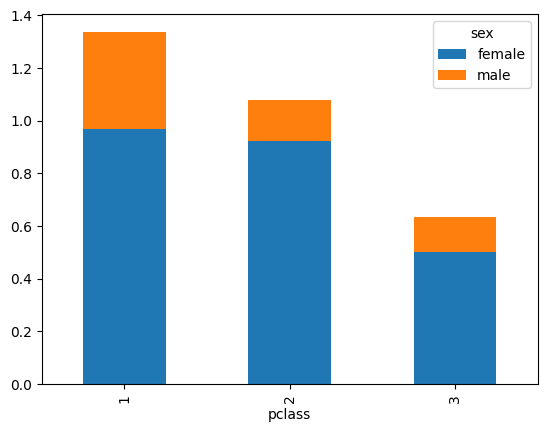

In [ ]:
# Question 20: Survival rate by passenger class and gender
survival_class_gender = df.groupby(['pclass', 'sex'])['survived'].mean().unstack()
survival_class_gender.plot(kind='bar', stacked=True)


#Seaborn

What does the distribution of passenger ages look like using a Seaborn histogram?

How does the fare paid by passengers vary across different passenger classes using Seaborn?

What is the gender distribution among passengers visualized with Seaborn?

Is there a relationship between passenger age and the fare they paid for tickets, and how can Seaborn help visualize this relationship?

What does the Seaborn distribution plot reveal about the distribution of passenger ages on the Titanic?

How can Seaborn be used to create a count plot to visualize the survival rate among passengers?

What is the Seaborn method for creating a bar plot to compare survival rates between male and female passengers?

How does Seaborn help in creating a box plot to visualize the distribution of fares paid by passengers in different classes?

Can Seaborn be used to create a correlation heatmap to explore relationships between variables like age, fare, and class?

What does the Seaborn count plot reveal about the distribution of passengers across different embarkation ports?

How does Seaborn enable the creation of a bar plot to visualize survival rates based on the embarkation port?

What is the Seaborn method for creating a count plot to visualize the distribution of the number of siblings/spouses (SibSp) among passengers?

Is it possible to use Seaborn to create a scatter plot to explore the correlation between the number of siblings/spouses and the fare paid by passengers?

How does Seaborn facilitate the creation of a bar plot to visualize the distribution of passengers' titles (e.g., Mr., Mrs., Miss)?

Can Seaborn be used to create a categorical scatter plot to explore the relationship between passenger titles and class or age?

What is the Seaborn method for creating a count plot to visualize the distribution of passengers' cabins or cabin prefixes?

How does Seaborn help in creating a bar plot to compare the fare paid by passengers with different cabin prefixes?

Is it possible to use Seaborn to create a box plot to identify outliers in the age or fare data?

What is the Seaborn method for creating a count plot to visualize the distribution of the number of parents/children (Parch) aboard?

How does Seaborn enable the creation of a bar plot to explore the relationship between the number of parents/children and passenger survival, considering both passenger class and gender?

<Axes: xlabel='age', ylabel='Count'>

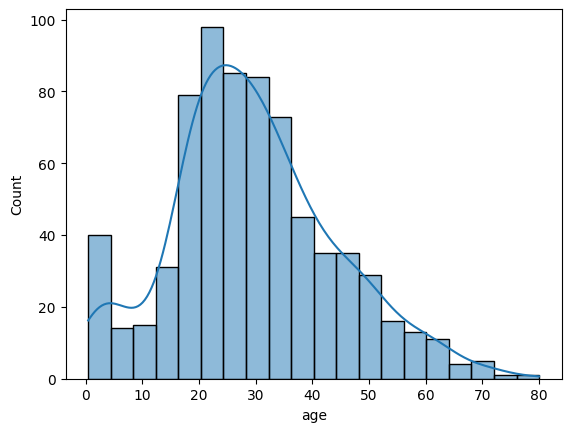

In [ ]:
# 1: Distribution of passenger ages using Seaborn histogram

sns.histplot(df['age'].dropna(), bins=20, kde=True)


<Axes: xlabel='pclass', ylabel='fare'>

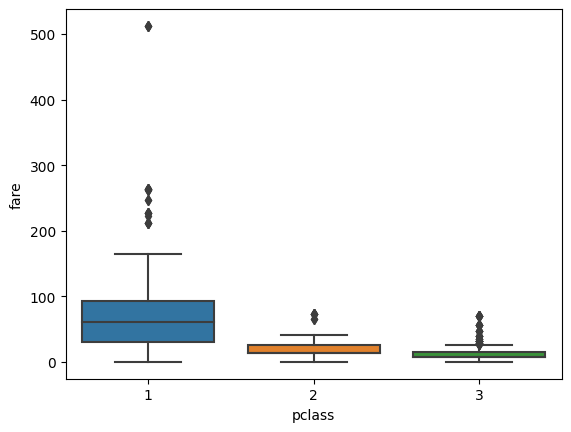

In [ ]:
#  2: Fare variation across different passenger classes with Seaborn
sns.boxplot(x='pclass', y='fare', data=df)


Text(0.5, 1.0, 'Gender Distribution Among Passengers')

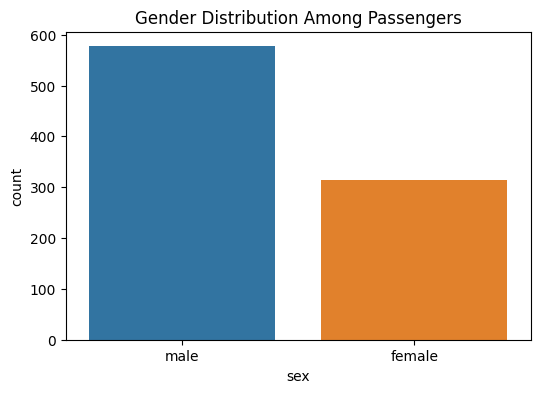

In [ ]:
#  3: Gender distribution among passengers visualized with Seaborn
sns.countplot(x='sex', data=df)

<Axes: xlabel='age', ylabel='fare'>

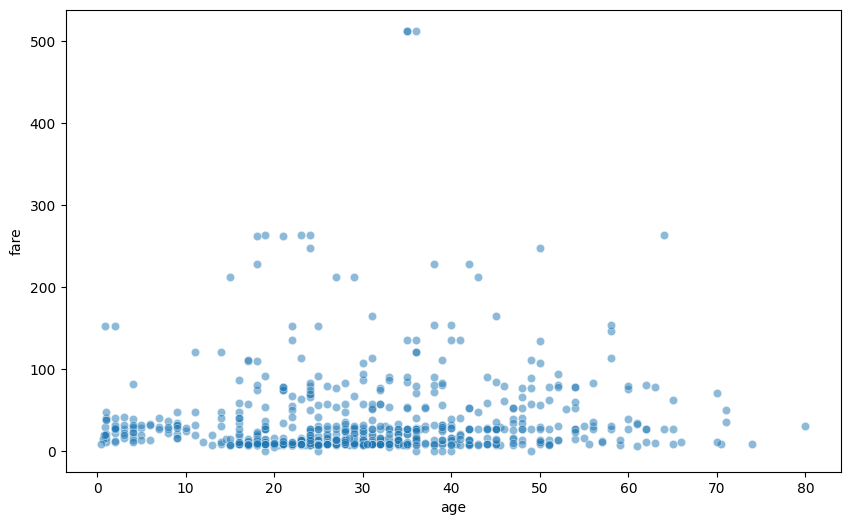

In [ ]:
#  4: Relationship between passenger age and fare using Seaborn scatter plot
sns.scatterplot(x='age', y='fare', data=df, alpha=0.5)

<Axes: xlabel='age', ylabel='Count'>

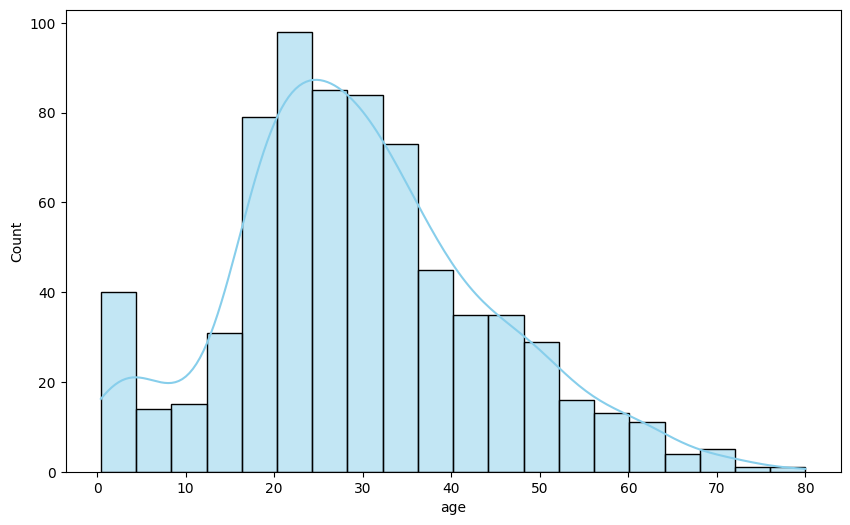

In [ ]:
#   5: Seaborn distribution plot for passenger ages
sns.histplot(df['age'].dropna(), kde=True, color='skyblue')

<Axes: xlabel='survived', ylabel='count'>

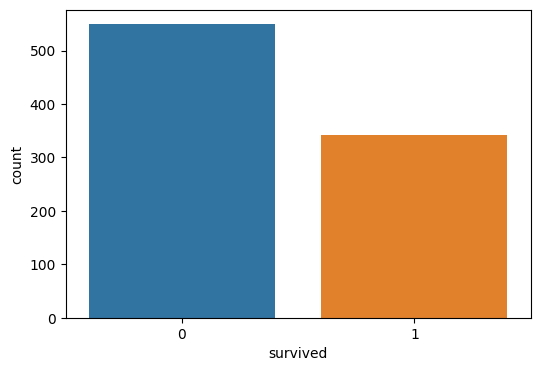

In [ ]:
#   6: Count plot to visualize survival rate among passengers with Seaborn
sns.countplot(x='survived', data=df)

<Axes: xlabel='sex', ylabel='survived'>

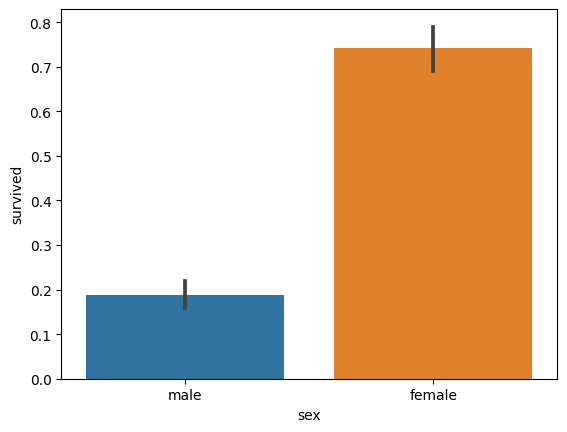

In [ ]:
#   7: Bar plot comparing survival rates between male and female passengers
sns.barplot(x='sex', y='survived', data=df)

<Axes: xlabel='pclass', ylabel='fare'>

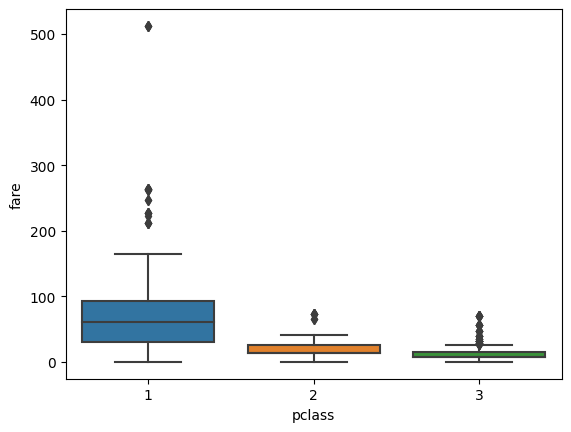

In [ ]:
#   8: Box plot to visualize fare distribution in different classes with Seaborn
sns.boxplot(x='pclass', y='fare', data=df)

<ipython-input-117-10da2df9169b>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

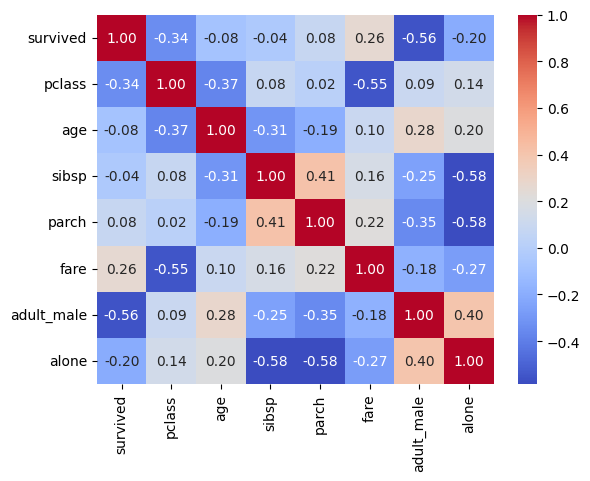

In [ ]:
#   9: Correlation heatmap to explore relationships with Seaborn
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

<Axes: xlabel='embarked', ylabel='count'>

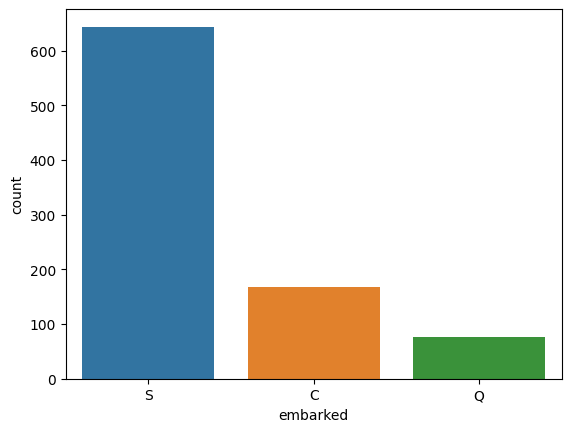

In [ ]:
#   10: Count plot for distribution of passengers across embarkation ports
sns.countplot(x='embarked', data=df)

<Axes: xlabel='embarked', ylabel='survived'>

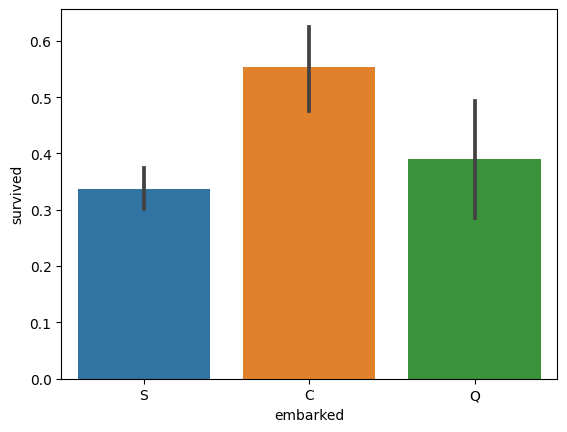

In [ ]:
#   11: Bar plot to visualize survival rates based on embarkation port with Seaborn
sns.barplot(x='embarked', y='survived', data=df)

<Axes: xlabel='sibsp', ylabel='count'>

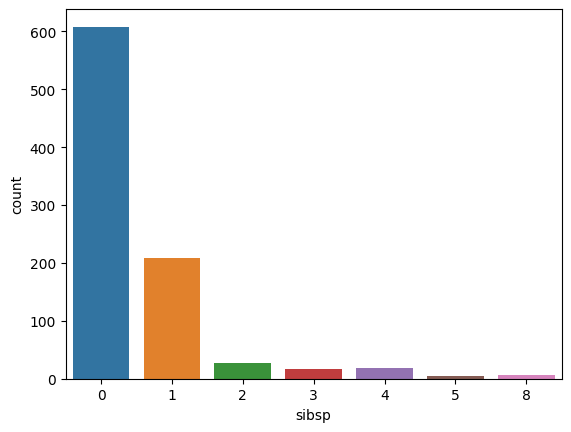

In [ ]:
#   12: Count plot for the distribution of SibSp (siblings/spouses) among passengers
sns.countplot(x='sibsp', data=df)

<Axes: xlabel='sibsp', ylabel='fare'>

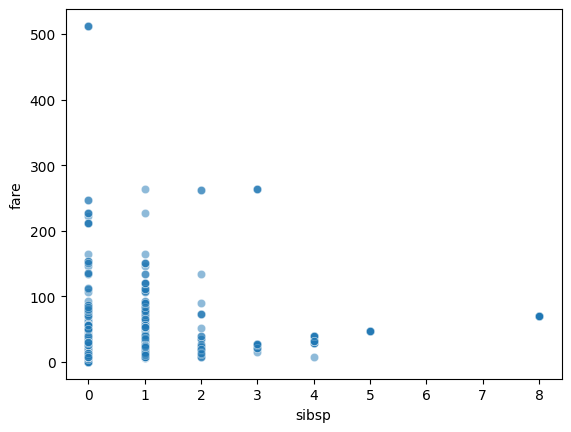

In [ ]:
#   13: Scatter plot to explore correlation between SibSp and fare with Seaborn
sns.scatterplot(x='sibsp', y='fare', data=df, alpha=0.5)

<Axes: xlabel='who', ylabel='count'>

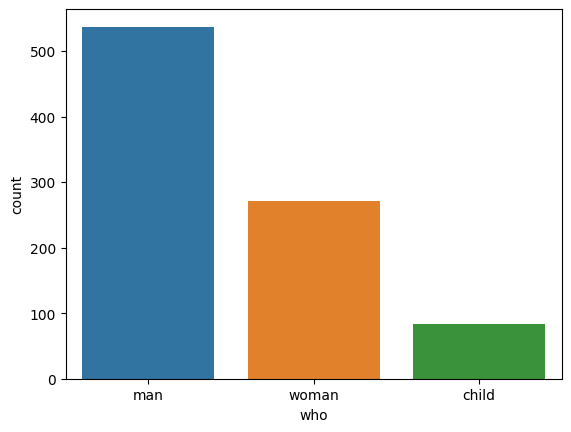

In [ ]:
#   14: Count plot for the distribution of passengers' titles (who)
sns.countplot(x='who', data=df)

<Axes: xlabel='who', ylabel='age'>

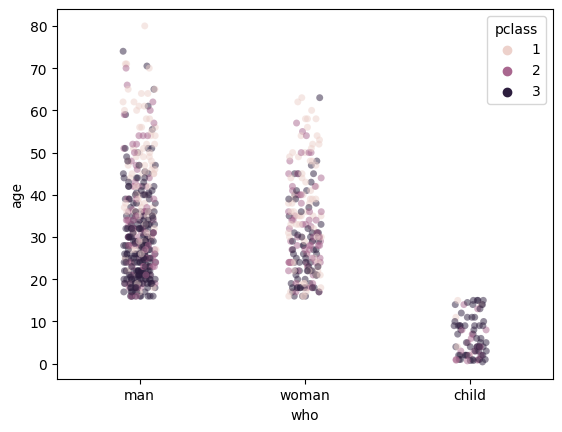

In [ ]:
#   15: Categorical scatter plot to explore the relationship between titles, class, and age
sns.stripplot(x='who', y='age', hue='pclass', data=df, jitter=True, alpha=0.5)

<Axes: xlabel='deck', ylabel='count'>

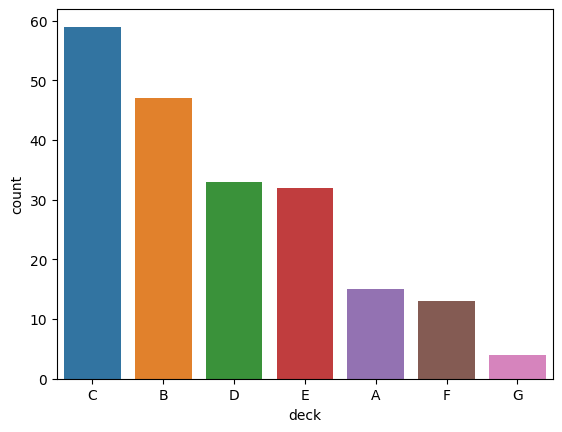

In [ ]:
#   16: Count plot for the distribution of passengers' cabins or cabin prefixes
sns.countplot(x='deck', data=df, order=df['deck'].value_counts().index)

<Axes: xlabel='deck', ylabel='fare'>

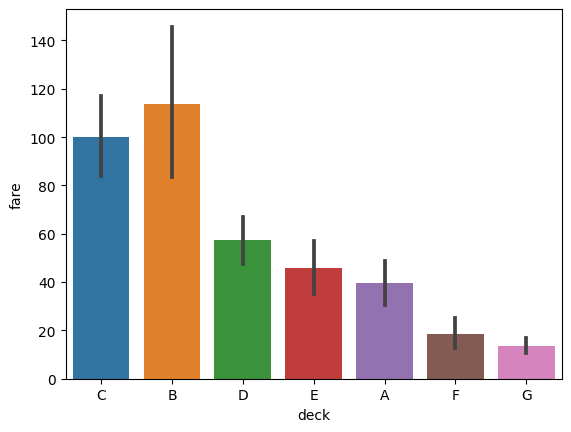

In [ ]:
#   17: Bar plot to compare the fare paid by passengers with different cabin prefixes
sns.barplot(x='deck', y='fare', data=df, order=df['deck'].value_counts().index)

<Axes: xlabel='age'>

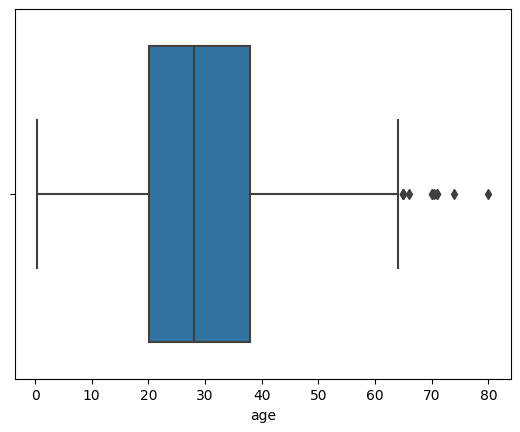

In [ ]:
#   18: Box plot to identify outliers in age or fare data
sns.boxplot(x='age', data=df)

<Axes: xlabel='parch', ylabel='count'>

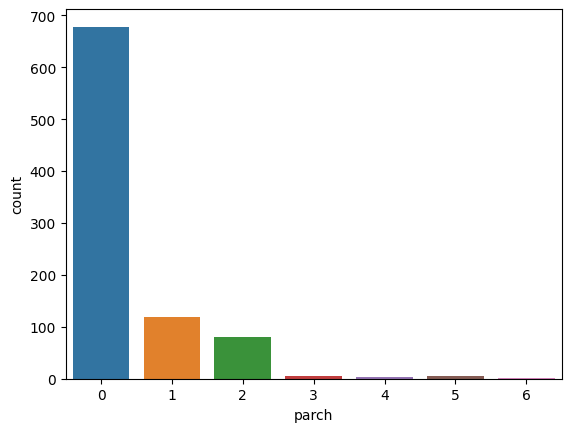

In [ ]:
#   19: Count plot for the distribution of the number of parents/children (Parch) aboard
sns.countplot(x='parch', data=df)

<Axes: xlabel='parch', ylabel='survived'>

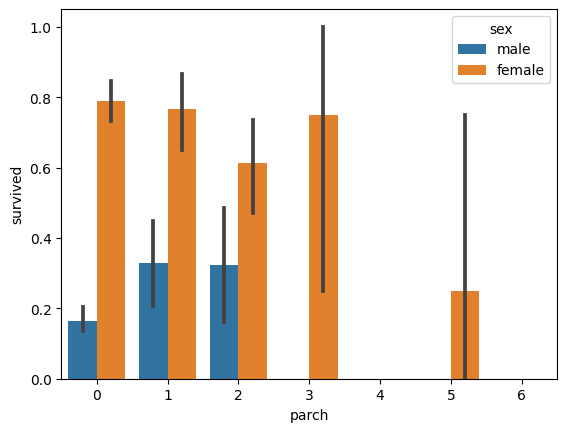

In [ ]:
#   20: Bar plot to explore the relationship between Parch and passenger survival, considering both class and gender
sns.barplot(x='parch', y='survived', hue='sex', data=df)